In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
problem_df = pd.read_csv("../data/problemsetall_data.csv")
problem_stat_df = pd.read_csv("../data/problemsetproblem_stat.csv")

In [3]:
problem_df = problem_df.set_index('contestId')
problem_stat_df = problem_stat_df.set_index('contestId')
problem_df.head()

,Problem_name,type,rating,tags,level
contestId,,,,,
1154,Minimum Possible LCM,PROGRAMMING,2400.0,['brute force'/ 'greedy'/ 'math'/ 'number theo...,G
1154,Shovels Shop,PROGRAMMING,2300.0,['dp'/ 'greedy'],F
1154,Two Teams,PROGRAMMING,1800.0,['data structures'/ 'implementation'/ 'sortings'],E
1154,Walking Robot,PROGRAMMING,1400.0,['greedy'],D
1154,Gourmet Cat,PROGRAMMING,1400.0,['implementation'/ 'math'],C


In [9]:
problem_df.head()

,contestId,Problem_name,type,rating,tags,level
0,1154,Minimum Possible LCM,PROGRAMMING,2400.0,['brute force'/ 'greedy'/ 'math'/ 'number theo...,G
1,1154,Shovels Shop,PROGRAMMING,2300.0,['dp'/ 'greedy'],F
2,1154,Two Teams,PROGRAMMING,1800.0,['data structures'/ 'implementation'/ 'sortings'],E
3,1154,Walking Robot,PROGRAMMING,1400.0,['greedy'],D
4,1154,Gourmet Cat,PROGRAMMING,1400.0,['implementation'/ 'math'],C


In [58]:
tag_str = list(problem_df[problem_df.columns[4]])
tags = [i[1:-2].split("/") for i in tag_str]
#tags = [i.strip() for i in tags]
tags

[["'brute force'", " 'greedy'", " 'math'", " 'number theory"],
 ["'dp'", " 'greedy"],
 ["'data structures'", " 'implementation'", " 'sortings"],
 ["'greedy"],
 ["'implementation'", " 'math"],
 ["'math"],
 ["'math"],
 ["'combinatorics'", " 'dp'", " 'math'", " 'probabilities"],
 ["'binary search'", " 'brute force"],
 ["'binary search'", " 'dfs and similar'", " 'dp'", " 'greedy'", " 'trees"],
 ["'greedy'", " 'strings"],
 ["'constructive algorithms'", " 'greedy"],
 ["'brute force'", " 'math"],
 ["'combinatorics'", " 'dp'", " 'matrices'", " 'probabilities"],
 ["'combinatorics'", " 'dp'", " 'math"],
 ["'greedy'", " 'math'", " 'sortings"],
 ["'constructive algorithms'", " 'math"],
 ["'bitmasks'", " 'brute force'", " 'constructive algorithms'", " 'dp"],
 ["'brute force'", " 'strings"],
 ["'dp'", " 'geometry"],
 ["'dp'", " 'flows'", " 'graphs"],
 ["'dp'", " 'trees"],
 ["'data structures'", " 'divide and conquer"],
 ["'dfs and similar'", " 'math"],
 ["'bitmasks'", " 'graphs"],
 ["'implementation

In [73]:
tt = []
for i in tags:
    for j in i:
        if j == '':
            pass
        else:
            tt.append(j.replace("'", "").strip())
tt = set(tt)
print(len(tt))
tt

36


{'*special',
 '2-sat',
 'binary search',
 'bitmasks',
 'brute force',
 'chinese remainder theorem',
 'combinatorics',
 'constructive algorithms',
 'data structures',
 'dfs and similar',
 'divide and conquer',
 'dp',
 'dsu',
 'expression parsing',
 'fft',
 'flows',
 'games',
 'geometry',
 'graph matchings',
 'graphs',
 'greedy',
 'hashing',
 'implementation',
 'math',
 'matrices',
 'meet-in-the-middle',
 'number theory',
 'probabilities',
 'schedules',
 'shortest paths',
 'sortings',
 'string suffix structures',
 'strings',
 'ternary search',
 'trees',
 'two pointers'}

In [75]:
d = {t:0 for t in tt}
for index, row in problem_df.iterrows():
    for t in tt:
        if t in row[4]:
            d[t] += 1

print(len(d))
d

36


{'combinatorics': 251,
 'hashing': 97,
 'fft': 33,
 'string suffix structures': 53,
 'flows': 72,
 'dsu': 164,
 'trees': 350,
 '2-sat': 10,
 'graph matchings': 34,
 'strings': 317,
 'expression parsing': 31,
 'ternary search': 23,
 'schedules': 5,
 'sortings': 419,
 'matrices': 68,
 'divide and conquer': 106,
 'shortest paths': 115,
 'binary search': 432,
 'graphs': 441,
 'geometry': 225,
 'probabilities': 118,
 'games': 84,
 'brute force': 706,
 'implementation': 1493,
 'bitmasks': 185,
 'chinese remainder theorem': 9,
 'dfs and similar': 438,
 'meet-in-the-middle': 24,
 'constructive algorithms': 558,
 'math': 1021,
 'data structures': 725,
 'number theory': 284,
 'dp': 953,
 '*special': 183,
 'greedy': 954,
 'two pointers': 175}

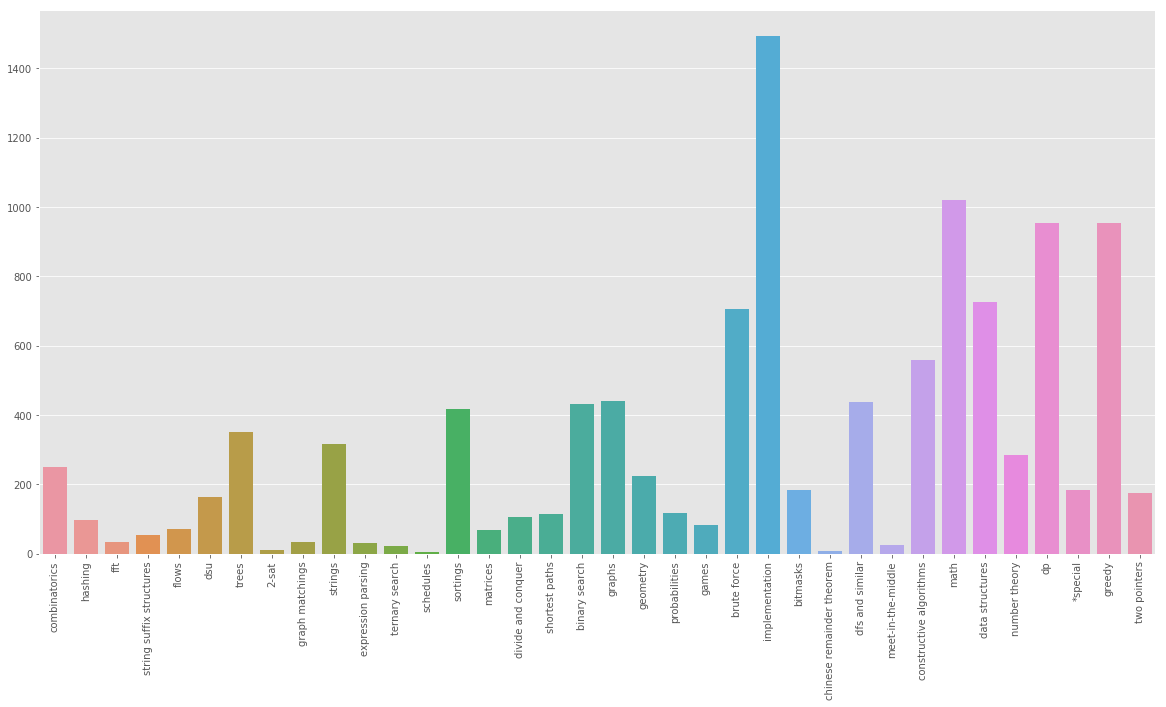

In [84]:
plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
g = sns.barplot(x=list(d.keys()), y=list(d.values()))
for item in g.get_xticklabels():
    item.set_rotation(90)